<a href="https://colab.research.google.com/github/jasonnho/flygaruda-sentiment-analysis/blob/main/notebook/flygaruda_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
from google_play_scraper import app, Sort, reviews_all

giaa_reviews = reviews_all(
    'com.ursabyte.garudaindonesiaairlines',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

##com.ursabyte.garudaindonesiaairlines

In [4]:
#Save Mobile JKN reviews into dataframe
df_giaarev = pd.DataFrame(np.array(giaa_reviews),columns=['content'])
df_giaarev = df_giaarev.join(pd.DataFrame(df_giaarev.pop('content').tolist()))
df_giaarev.to_csv(r'garuda_reviews', index=False)

In [5]:
df_giaarev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,79f3c98f-664e-4de0-8d7e-3f404e95638c,Mr. Chan,https://play-lh.googleusercontent.com/a/ACg8oc...,Harus belajar lagi bagaimana cara kau menghada...,4,0,6.16.0,2025-09-06 00:58:19,None,NaT,6.16.0
1,e156da20-58b4-45fe-9197-97bcfa3f541b,Ferdinand Polin,https://play-lh.googleusercontent.com/a/ACg8oc...,"Maskapai MALING, MENIPU customer dengan inform...",1,1,None,2025-09-03 09:23:02,None,NaT,None
2,7a829b34-aa03-4aff-a8fb-15afdf086beb,fauri ari,https://play-lh.googleusercontent.com/a/ACg8oc...,Dulu dpt platinum bs 5-6 tahun g pernah turun....,2,2,6.17.0,2025-08-25 16:38:50,None,NaT,6.17.0
3,45e4fbca-10be-4672-9e20-050ed8d8f74b,Hevlind Vanmarbos,https://play-lh.googleusercontent.com/a-/ALV-U...,sy delay 20 jam dgn penerbangan conecting seha...,1,0,6.17.0,2025-08-21 12:06:28,None,NaT,6.17.0
4,ab046dbd-cf96-4598-871d-d6bcf185dea1,1IA10_Raja Krisna M,https://play-lh.googleusercontent.com/a-/ALV-U...,Sedikit Panik Setelah Check-in Boarding Tiket ...,4,0,6.17.0,2025-08-18 05:44:32,None,NaT,6.17.0
...,...,...,...,...,...,...,...,...,...,...,...
4846,cd48830c-b22f-4c3c-8ba9-c0962e6b0078,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bermanfaat,5,0,None,2015-02-15 19:45:50,None,NaT,None
4847,ea094226-7185-48b9-820c-57c3fb530779,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Like,5,0,None,2015-02-14 11:07:30,None,NaT,None
4848,7f9dfcf6-dc04-451f-b209-3865ad5a69d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya terbantu...,5,0,None,2015-02-13 02:06:06,None,NaT,None
4849,555eebf6-9d51-437c-818c-9729c23aed16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,.,5,0,None,2015-02-07 02:25:54,None,NaT,None


In [6]:
df_giaarev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4851 entries, 0 to 4850
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4851 non-null   object        
 1   userName              4851 non-null   object        
 2   userImage             4851 non-null   object        
 3   content               4851 non-null   object        
 4   score                 4851 non-null   int64         
 5   thumbsUpCount         4851 non-null   int64         
 6   reviewCreatedVersion  3290 non-null   object        
 7   at                    4851 non-null   datetime64[ns]
 8   replyContent          1513 non-null   object        
 9   repliedAt             1513 non-null   datetime64[ns]
 10  appVersion            3290 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 417.0+ KB


In [7]:
df_analysis = df_giaarev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_analysis

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Harus belajar lagi bagaimana cara kau menghada...,4,0,6.16.0,2025-09-06 00:58:19,None,NaT
1,"Maskapai MALING, MENIPU customer dengan inform...",1,1,None,2025-09-03 09:23:02,None,NaT
2,Dulu dpt platinum bs 5-6 tahun g pernah turun....,2,2,6.17.0,2025-08-25 16:38:50,None,NaT
3,sy delay 20 jam dgn penerbangan conecting seha...,1,0,6.17.0,2025-08-21 12:06:28,None,NaT
4,Sedikit Panik Setelah Check-in Boarding Tiket ...,4,0,6.17.0,2025-08-18 05:44:32,None,NaT
...,...,...,...,...,...,...,...
4846,sangat bermanfaat,5,0,None,2015-02-15 19:45:50,None,NaT
4847,Like,5,0,None,2015-02-14 11:07:30,None,NaT
4848,Saya terbantu...,5,0,None,2015-02-13 02:06:06,None,NaT
4849,.,5,0,None,2015-02-07 02:25:54,None,NaT


In [8]:
df_analysis.isnull().sum()

,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,1561
at,0
replyContent,3338
repliedAt,3338


Text(0.5, 0, 'Score')

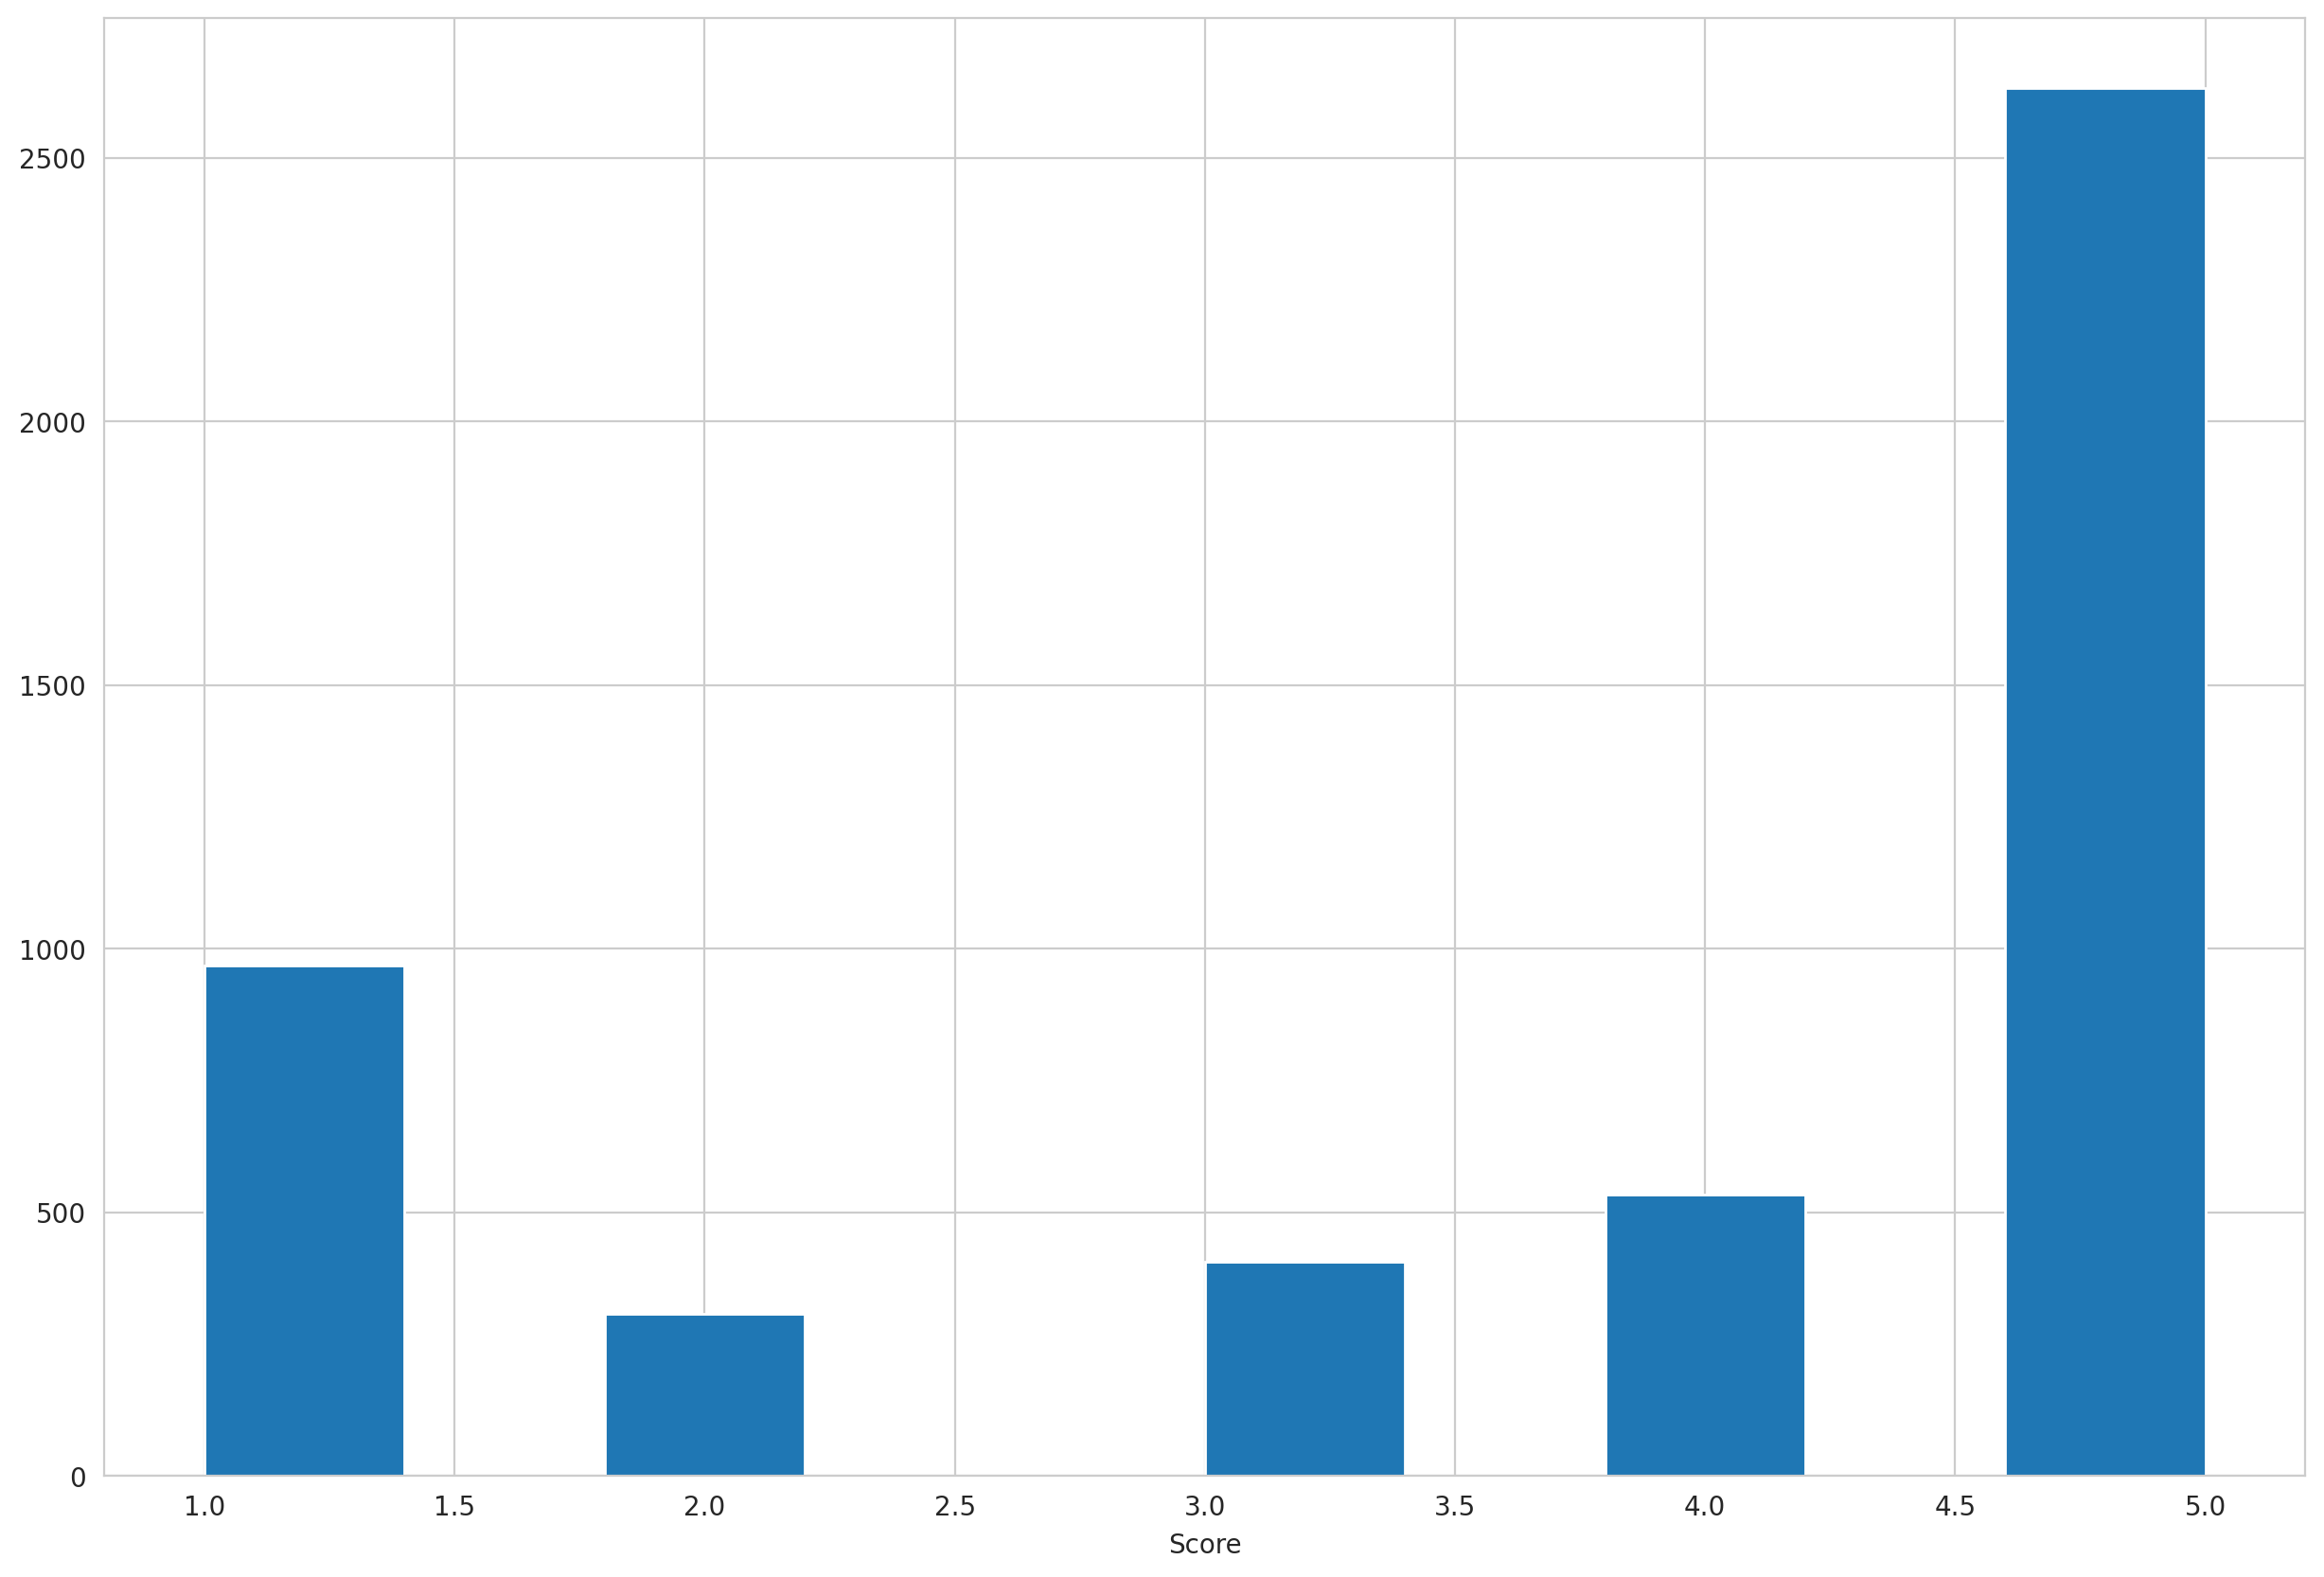

In [9]:
plt.hist(df_analysis['score'])
plt.xlabel('Score')